<a href="https://colab.research.google.com/github/SubhankarSamanta295/Spam-Classification/blob/main/NLP_Spam_Email.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import nltk
#nltk.download('stopwords')
#from nltk.corpus import stopwords

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.corpus import stopwords
import string
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Spam Email/emails.csv')
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
print('Dataset shape : {} \n'.format(data.shape))
print('Clumns in the dataset : {} \n'.format(data.columns))
print('{} \n'.format(data['spam'].value_counts()))

Dataset shape : (5728, 2) 

Clumns in the dataset : Index(['text', 'spam'], dtype='object') 

0    4360
1    1368
Name: spam, dtype: int64 



In [ ]:
data['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

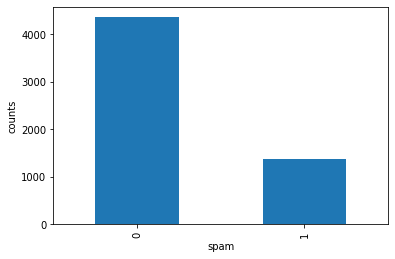

In [ ]:
data['spam'].value_counts().plot.bar()
plt.xlabel('spam')
plt.ylabel('counts')
plt.show()

In [ ]:
#Drop duplicates
data.drop_duplicates(inplace=True)

In [ ]:
#Dataset after droping the duplicates
print('Dataset shape : {} \n'.format(data.shape))
print('Columns in the dataset : {} \n'.format(data.columns))
print('{} \n'.format(data['spam'].value_counts()))
print('{}'.format(data.isnull().sum()))

Dataset shape : (5695, 2) 

Columns in the dataset : Index(['text', 'spam'], dtype='object') 

0    4327
1    1368
Name: spam, dtype: int64 

text    0
spam    0
dtype: int64


In [ ]:
#Finding out the percentage of missing values
features_nan = [feature for feature in data.columns if data[feature].isnull().sum()>0]
for feature in features_nan:
  print(feature,np.round(data[feature].mean(),decimal=4))

#Do it if you have missing values

In [ ]:
#download the stopwards package
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#1-> Remove punctuation, 2-> Remove Stopwards, 3-> Return Clear text
def process_text(text):
  nonpunc = [char for char in text if char not in string.punctuation]
  nonpunc = ''.join(nonpunc)

  clean_words = [word for word in nonpunc.split() if word.lower not in stopwords.words('english')]

  return clean_words

In [ ]:
#Show the tokenization (a list of tokens also called lemmas)
data['text'].head().apply(process_text)

0    [Subject, naturally, irresistible, your, corpo...
1    [Subject, the, stock, trading, gunslinger, fan...
2    [Subject, unbelievable, new, homes, made, easy...
3    [Subject, 4, color, printing, special, request...
4    [Subject, do, not, have, money, get, software,...
Name: text, dtype: object

In [ ]:
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
#Convert a collection of text to matrix of tokens
from sklearn.feature_extraction.text import CountVectorizer
messages_bow = CountVectorizer(analyzer=process_text).fit_transform(data['text'])

In [ ]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(messages_bow, data['spam'], test_size=0.2, random_state = 80)

### Model Testing/ Building

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier_multi = MultinomialNB()
classifier_multi.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
#Printing train predictions
print(classifier_multi.predict(x_train))

#Printing test predictions
print(classifier_multi.predict(x_test))

[0 0 1 ... 0 0 1]
[0 0 0 ... 0 1 1]


In [ ]:
#Visualizing the performace of the model
y_pred_train = classifier_multi.predict(x_train)

#Printing the classification_report
print(classification_report(y_train, y_pred_train))

#Printing the confusion_matrix
cm = confusion_matrix(y_train , y_pred_train)
print(cm)

#Printing the accuracy score
acc_score = accuracy_score(y_pred_train , y_train)
acc_score = acc_score*100
print('Accuracy of training set {}%'.format(acc_score))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3474
           1       0.99      1.00      0.99      1082

    accuracy                           1.00      4556
   macro avg       0.99      1.00      1.00      4556
weighted avg       1.00      1.00      1.00      4556

[[3460   14]
 [   1 1081]]
Accuracy of training set 99.67076382791923%


In [ ]:
#Visualizing the performace of the model
y_pred_test = classifier_multi.predict(x_test)

#Printing the classification_report
print(classification_report(y_test, y_pred_test))

#Printing the confusion_matrix
cm = confusion_matrix(y_test , y_pred_test)
print(cm)

#Printing the accuracy score
acc_score = accuracy_score(y_pred_test , y_test)
acc_score = acc_score*100
print('Accuracy of training set {}%'.format(acc_score))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       853
           1       0.98      1.00      0.99       286

    accuracy                           0.99      1139
   macro avg       0.99      0.99      0.99      1139
weighted avg       0.99      0.99      0.99      1139

[[847   6]
 [  1 285]]
Accuracy of training set 99.3854258121159%
